### 머그워트

In [2]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

In [10]:
final_mug = pd.read_csv("data/final_mug.csv")

In [107]:
idx = final_mug[final_mug['point']<=3].index
final_mug = final_mug.drop(idx)
final_mug.dropna(inplace=True)
final_mug.drop_duplicates(['review'], keep = 'first', ignore_index=True, inplace=True)
del final_mug['date']
del final_mug['Unnamed: 0']

TypeError: drop() got an unexpected keyword argument 'ignore_index'

In [109]:
import nltk
from konlpy.tag import Okt
Okt=Okt()

final_mug["noun"] = final_mug["review"].apply(Okt.nouns)

tokens_mug = [take2 for take1 in final_mug["noun"] for take2 in take1]
text = nltk.Text(tokens_mug, name="NMSC")


In [110]:
text.vocab().most_common(100)

[('피부', 1788),
 ('진정', 1596),
 ('사용', 1505),
 ('제품', 1120),
 ('구매', 1101),
 ('효과', 961),
 ('에센스', 927),
 ('트러블', 915),
 ('것', 833),
 ('때', 746),
 ('거', 710),
 ('팩', 659),
 ('쑥', 650),
 ('스킨', 590),
 ('더', 510),
 ('느낌', 492),
 ('용량', 456),
 ('향', 451),
 ('여드름', 433),
 ('가격', 422),
 ('솜', 403),
 ('일', 379),
 ('화장', 375),
 ('진짜', 368),
 ('저', 358),
 ('배송', 349),
 ('통째', 347),
 ('흡수', 343),
 ('자극', 336),
 ('좀', 326),
 ('추천', 312),
 ('계속', 289),
 ('보습', 288),
 ('또', 283),
 ('임', 272),
 ('병', 267),
 ('얼굴', 263),
 ('토너', 261),
 ('이', 255),
 ('항상', 252),
 ('프롬', 236),
 ('보고', 236),
 ('아주', 235),
 ('정말', 229),
 ('마스크', 228),
 ('정도', 227),
 ('구입', 223),
 ('통', 217),
 ('처음', 207),
 ('생각', 200),
 ('쑥향', 199),
 ('용', 187),
 ('한번', 184),
 ('냄새', 178),
 ('쓰기', 177),
 ('형', 175),
 ('주문', 170),
 ('좁쌀', 169),
 ('제', 167),
 ('템', 165),
 ('할인', 164),
 ('번', 164),
 ('전', 164),
 ('때문', 164),
 ('수분', 161),
 ('후기', 160),
 ('물', 157),
 ('머그', 156),
 ('바로', 152),
 ('후', 151),
 ('성분', 150),
 ('무난', 147),
 ('요즘',

In [111]:
stop_words = ['제품', '구매', '사용', '것', '때', '거', '더', '용량', '일', '진짜', '저', '배송', '통째', '좀', '또',
              '임', '이', '항상', '보고', '아주', '정말', '정도', '구입', '통', '생각', '용', '형', '주문', '제', '템',
              '번', '전', '때문', '바로', '후', '요즘', '다음', '벌써', '날', '일단', '늘', '걸', '상품', '다른', '쟁',
              '끈', '감', '금방', '안', '중', '사서', '요']

tokens_mug1 = [each_word for each_word in tokens_mug
              if each_word not in stop_words]
text1 = nltk.Text(tokens_mug1)


In [113]:
text1.vocab().most_common(100)

[('피부', 1788),
 ('진정', 1596),
 ('효과', 961),
 ('에센스', 927),
 ('트러블', 915),
 ('팩', 659),
 ('쑥', 650),
 ('스킨', 590),
 ('느낌', 492),
 ('향', 451),
 ('여드름', 433),
 ('가격', 422),
 ('솜', 403),
 ('화장', 375),
 ('흡수', 343),
 ('자극', 336),
 ('추천', 312),
 ('계속', 289),
 ('보습', 288),
 ('병', 267),
 ('얼굴', 263),
 ('토너', 261),
 ('프롬', 236),
 ('마스크', 228),
 ('처음', 207),
 ('쑥향', 199),
 ('한번', 184),
 ('냄새', 178),
 ('쓰기', 177),
 ('좁쌀', 169),
 ('할인', 164),
 ('수분', 161),
 ('후기', 160),
 ('물', 157),
 ('머그', 156),
 ('성분', 150),
 ('무난', 147),
 ('워트', 138),
 ('그냥', 137),
 ('조금', 136),
 ('완전', 130),
 ('결', 130),
 ('건성', 126),
 ('케어', 125),
 ('자주', 122),
 ('다시', 121),
 ('발라', 117),
 ('홍조', 116),
 ('하나', 114),
 ('나', 111),
 ('약간', 111),
 ('원래', 108),
 ('민감', 108),
 ('최고', 107),
 ('수', 105),
 ('해', 105),
 ('지금', 102),
 ('의사', 101),
 ('이번', 99),
 ('습', 98),
 ('크림', 97),
 ('유리', 96),
 ('겨울', 95),
 ('듯', 94),
 ('화장품', 91),
 ('눈', 90),
 ('개', 90),
 ('인생', 89),
 ('아침', 88),
 ('마음', 86),
 ('앞', 85),
 ('고민', 85),
 ('도움', 84),
 

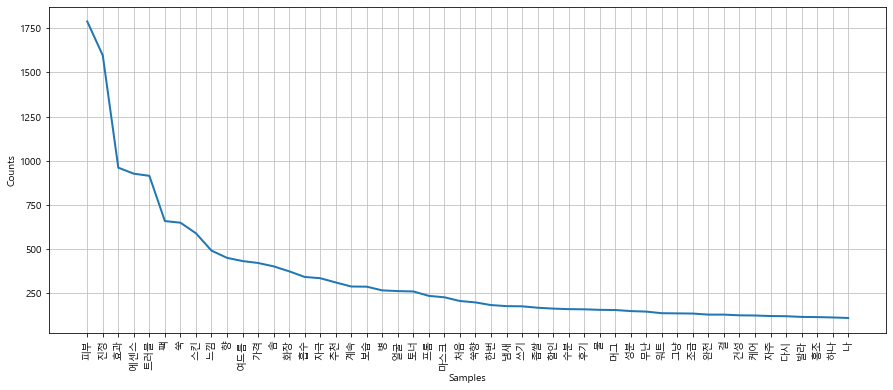

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.font_manager as fm
from pylab import plot, show
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
mpl.rcParams["axes.unicode_minus"] = False


plt.figure(figsize=(15, 6))
text1.plot(50)
plt.show()

In [ ]:
"""
피부 - 당연하지만 피부에 관한 제품이다.
진정 - 머그워트는 피부 진정에 관한 제품이라고 볼 수 있다.
효과 - 리뷰 포인트 4점 이상 기준 효과가 좋다라고 볼 수 있다.
에센스 - 에센스로도 출시되는 상품이다.
트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.
팩 - 팩으로도 출시되는 상품이다.
쑥 - 머그워트가 영어로 쑥이라고 한다.
스킨 - 스킨으로도 출시되는 상품이다.
느낌 - 구매자들이 느낌을 어느정도 중요시 한다.
향 - 구매자들이 향을 어느정도 중요시 한다.
여드름 - 여드름에 관련된 상품이라고 생각 할 수 있다.
"""


In [127]:
from wordcloud import WordCloud
data = text1.vocab().most_common(100)

wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='pink',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 프로폴리스

In [13]:
final_propol = pd.read_csv("data/final_propol.csv")

In [14]:
idx = final_propol[final_propol['point']<=3].index
final_propol = final_propol.drop(idx)
final_propol.dropna(inplace=True)
final_propol.drop_duplicates(['review'], keep = 'first', ignore_index=True, inplace=True)
del final_propol['date']
del final_propol['Unnamed: 0']

In [15]:
import nltk
from konlpy.tag import Okt
Okt=Okt()

final_propol["noun"] = final_propol["review"].apply(Okt.nouns)

tokens_propol = [take2 for take1 in final_propol["noun"] for take2 in take1]
text = nltk.Text(tokens_propol, name="NMSC")


In [144]:
text.vocab().most_common(100)

[('피부', 5846),
 ('사용', 5208),
 ('구매', 4354),
 ('제품', 4224),
 ('앰플', 3659),
 ('흡수', 3566),
 ('것', 2521),
 ('트러블', 2262),
 ('느낌', 2246),
 ('배송', 2211),
 ('거', 2126),
 ('때', 2084),
 ('더', 2046),
 ('끈', 2036),
 ('프로폴리스', 1677),
 ('겨울', 1437),
 ('가격', 1387),
 ('보고', 1377),
 ('수분', 1364),
 ('항상', 1299),
 ('용량', 1296),
 ('추천', 1264),
 ('건조', 1231),
 ('또', 1214),
 ('건성', 1186),
 ('크림', 1161),
 ('보습', 1137),
 ('좀', 1131),
 ('아주', 1122),
 ('정말', 1114),
 ('토너', 1100),
 ('쫀쫀', 1097),
 ('처음', 1095),
 ('계속', 1094),
 ('진짜', 1075),
 ('효과', 1066),
 ('저', 1063),
 ('생각', 946),
 ('구입', 922),
 ('쓰기', 918),
 ('화장', 918),
 ('통째', 894),
 ('이', 863),
 ('얼굴', 848),
 ('주문', 842),
 ('전', 835),
 ('스킨', 822),
 ('감', 760),
 ('알', 753),
 ('제', 737),
 ('아침', 732),
 ('통', 718),
 ('행사', 717),
 ('조금', 696),
 ('정도', 689),
 ('병', 683),
 ('발라', 668),
 ('바로', 661),
 ('한번', 646),
 ('템', 616),
 ('쟁', 604),
 ('늘', 601),
 ('다음', 599),
 ('후', 587),
 ('이번', 586),
 ('적임', 585),
 ('번', 583),
 ('용', 573),
 ('무난', 563),
 ('형', 556),
 

In [16]:
stop_words = ['앰플', '제품', '구매', '사용', '것', '때', '거', '더', '용량', '일', '진짜', '저', '배송', '통째', '좀', '또',
              '임', '이', '항상', '보고', '아주', '정말', '정도', '구입', '통', '생각', '용', '형', '주문', '제', '템',
              '번', '전', '때문', '바로', '후', '요즘', '다음', '벌써', '날', '일단', '늘', '걸', '상품', '다른', '쟁',
              '끈', '감', '금방', '안', '중', '사서', '요']

tokens_propol1 = [each_word for each_word in tokens_propol
              if each_word not in stop_words]
text1 = nltk.Text(tokens_propol1)


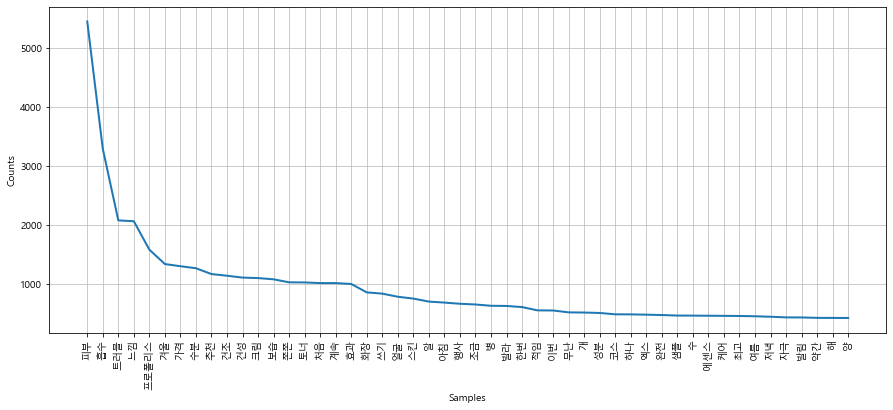

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.font_manager as fm
from pylab import plot, show
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
mpl.rcParams["axes.unicode_minus"] = False


plt.figure(figsize=(15, 6))
text1.plot(50)
plt.show()

In [18]:
"""
피부 - 피부에 관련된 제품이다.
흡수 - 흡수가 잘되는 제품이라고 추측 해 볼 수 있다.
트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.
느낌 - 특별한 느낌이 있다고 생각해 볼 수 있다.
프로폴리스 - 성분의 이름이다.
겨울 - 겨울피부과 관련이 있다고 생각해 볼 수 있다.(건조)
가격 - 가격을 신경쓰는 사람들이 꽤나 있다.
수분 - 수분에 관련된 제품이라고 생각해 볼 수 있다.(겨울과 연관)
건조, 건성 - 피부가 건조한 구매자가 꽤나 있다고 추측해 볼 수 있다.
"""

'\n피부 - 피부에 관련된 제품이다.\n흡수 - 흡수가 잘되는 제품이라고 추측 해 볼 수 있다.\n트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.\n느낌 - 특별한 느낌이 있다고 생각해 볼 수 있다.\n프로폴리스 - 성분의 이름이다.\n겨울 - 겨울피부과 관련이 있다고 생각해 볼 수 있다.(건조)\n가격 - 가격을 신경쓰는 사람들이 꽤나 있다.\n수분 - 수분에 관련된 제품이라고 생각해 볼 수 있다.(겨울과 연관)\n건조, 건성 - 피부가 건조한 구매자가 꽤나 있다고 추측해 볼 수 있다.\n'

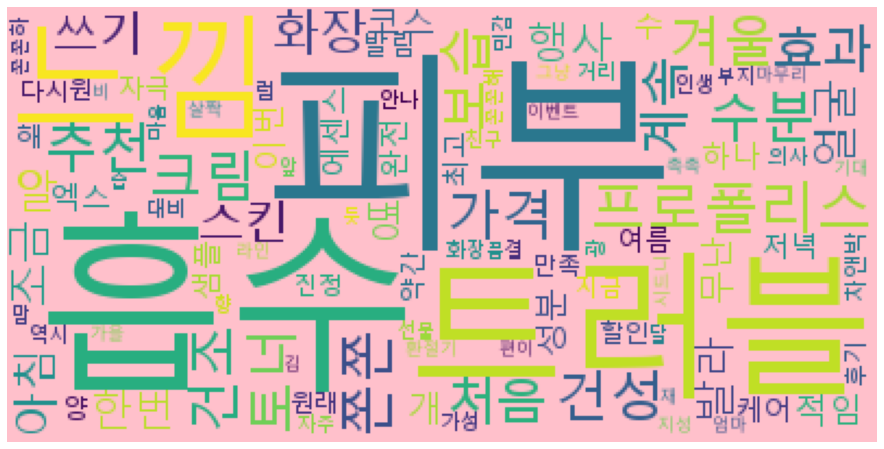

In [19]:
from wordcloud import WordCloud
data = text1.vocab().most_common(100)

wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='pink',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 나이아신아마이드

In [3]:
final_niasin = pd.read_csv("data/final_niasin.csv")

In [4]:
idx = final_niasin[final_niasin['point']<=3].index
final_niasin = final_niasin.drop(idx)
final_niasin.dropna(inplace=True)
final_niasin.drop_duplicates(['review'], keep = 'first', ignore_index=True, inplace=True)
del final_niasin['date']
del final_niasin['Unnamed: 0']

In [5]:
import nltk
from konlpy.tag import Okt
Okt=Okt()

final_niasin["noun"] = final_niasin["review"].apply(Okt.nouns)

tokens_niasin = [take2 for take1 in final_niasin["noun"] for take2 in take1]
text = nltk.Text(tokens_niasin, name="NMSC")


In [6]:
text.vocab().most_common(100)

[('피부', 3737),
 ('사용', 2826),
 ('앰플', 1929),
 ('구매', 1854),
 ('제품', 1850),
 ('느낌', 1361),
 ('블랙', 1128),
 ('티', 1097),
 ('것', 1055),
 ('흡수', 1010),
 ('때', 840),
 ('향', 788),
 ('샘플', 768),
 ('효과', 759),
 ('더', 755),
 ('아침', 720),
 ('품', 718),
 ('끈', 700),
 ('거', 677),
 ('크림', 658),
 ('보고', 651),
 ('체험', 596),
 ('이벤트', 560),
 ('가격', 501),
 ('얼굴', 497),
 ('보습', 497),
 ('다음', 491),
 ('이니스프리', 481),
 ('저녁', 478),
 ('용량', 475),
 ('날', 473),
 ('구입', 468),
 ('저', 458),
 ('수', 453),
 ('후', 450),
 ('트러블', 436),
 ('정말', 420),
 ('좀', 417),
 ('이', 411),
 ('수분', 397),
 ('발림', 394),
 ('겨울', 393),
 ('생각', 389),
 ('결', 375),
 ('발라', 366),
 ('바로', 365),
 ('계속', 358),
 ('추천', 358),
 ('형', 354),
 ('럼', 344),
 ('처음', 341),
 ('세트', 327),
 ('밤', 324),
 ('또', 322),
 ('제', 320),
 ('전', 315),
 ('건성', 313),
 ('쫀쫀', 309),
 ('진짜', 309),
 ('감', 309),
 ('정도', 304),
 ('에센스', 299),
 ('번', 290),
 ('요즘', 278),
 ('라인', 274),
 ('자극', 267),
 ('주문', 260),
 ('한번', 257),
 ('조금', 252),
 ('병', 246),
 ('이번', 245),
 ('스포이드', 245)

In [10]:
stop_words = ['제품', '앰플', '구매', '사용', '것', '때', '거', '더', '용량', '일', '진짜', '저', '배송', '통째', '좀', '또',
              '임', '이', '항상', '보고', '아주', '정말', '정도', '구입', '통', '생각', '용', '형', '주문', '제', '템',
              '번', '전', '때문', '바로', '후', '요즘', '다음', '벌써', '날', '일단', '늘', '걸', '상품', '다른', '쟁',
              '끈', '감', '금방', '안', '중', '사서', '요']

tokens_niasin1 = [each_word for each_word in tokens_niasin
              if each_word not in stop_words]
text1 = nltk.Text(tokens_niasin1)


In [8]:
text1.vocab().most_common(100)

[('피부', 3737),
 ('앰플', 1929),
 ('느낌', 1361),
 ('블랙', 1128),
 ('티', 1097),
 ('흡수', 1010),
 ('향', 788),
 ('샘플', 768),
 ('효과', 759),
 ('아침', 720),
 ('품', 718),
 ('크림', 658),
 ('체험', 596),
 ('이벤트', 560),
 ('가격', 501),
 ('얼굴', 497),
 ('보습', 497),
 ('이니스프리', 481),
 ('저녁', 478),
 ('수', 453),
 ('트러블', 436),
 ('수분', 397),
 ('발림', 394),
 ('겨울', 393),
 ('결', 375),
 ('발라', 366),
 ('계속', 358),
 ('추천', 358),
 ('럼', 344),
 ('처음', 341),
 ('세트', 327),
 ('밤', 324),
 ('건성', 313),
 ('쫀쫀', 309),
 ('에센스', 299),
 ('라인', 274),
 ('자극', 267),
 ('한번', 257),
 ('조금', 252),
 ('병', 246),
 ('이번', 245),
 ('스포이드', 245),
 ('마음', 244),
 ('유스', 242),
 ('적임', 240),
 ('선물', 224),
 ('케어', 224),
 ('맘', 223),
 ('하나', 222),
 ('건조', 221),
 ('화장품', 213),
 ('할인', 208),
 ('구성', 208),
 ('지금', 208),
 ('기분', 204),
 ('인핸싱', 200),
 ('탄력', 194),
 ('스킨', 190),
 ('성분', 185),
 ('나이트', 184),
 ('후기', 181),
 ('의사', 177),
 ('쓰기', 177),
 ('화장', 175),
 ('개선', 173),
 ('기대', 168),
 ('듯', 167),
 ('그린티', 166),
 ('완전', 166),
 ('세안', 163),
 ('용감', 160)

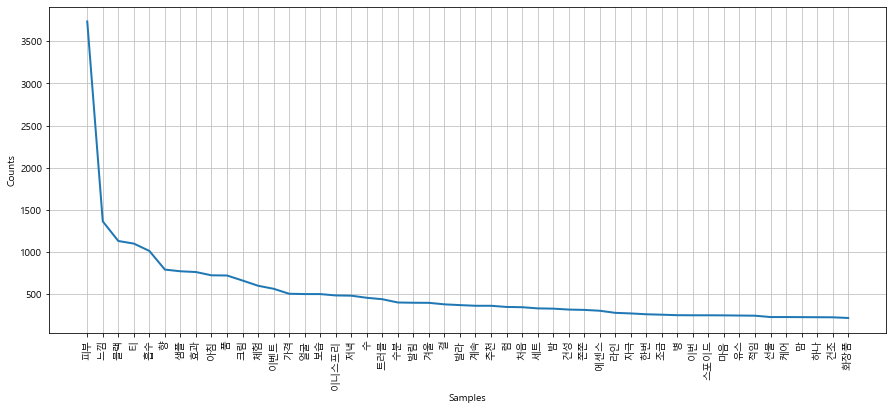

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.font_manager as fm
from pylab import plot, show
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
mpl.rcParams["axes.unicode_minus"] = False


plt.figure(figsize=(15, 6))
text1.plot(50)
plt.show()

In [ ]:
"""
피부 - 피부에 관한 제품이다.
느낌 - 구매자들은 느낌을 꽤나 중요시한다.
블랙 - 제품 색상을 유추해 볼 수 있다.
티 - ?
흡수 - 흡수에 관해 효과가 있는 제품이라고 추측할 수 있다.
향 - 향을 꽤나 언급했다.
아침 - 아침에 사용하는 사람이 꽤나 있다.
보습 - 보습에 관해 효과가 있는 제품이라고 추측할 수 있다.
"""

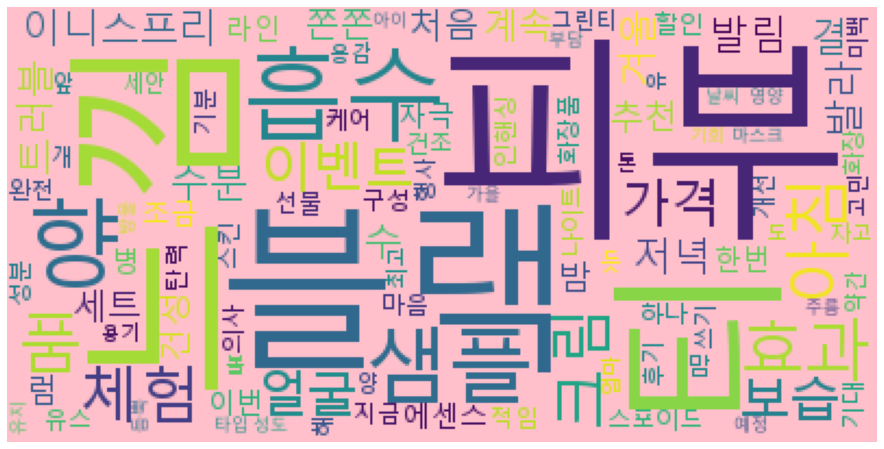

In [12]:
from wordcloud import WordCloud
data = text1.vocab().most_common(100)

wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='pink',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()